# Red Neuronal para predecir la temperatura de mañana

En este proyecto buscamos desarrollar un modelo capaz de predecir la temperatura máxima del día siguiente a partir de los datos históricos recientes.

La idea es la siguiente: partimos de la información disponible del día de ayer (ya conocida por completo hoy) y la utilizamos para estimar cuál será la temperatura máxima de mañana.

Para ello exploraremos diferentes enfoques:

Redes Neuronales Densas (Fully Connected)

Redes LSTM (Long Short-Term Memory), diseñadas para trabajar con series temporales.

Modelos de Machine Learning tradicionales, como los árboles de decisión.

De esta manera podremos comparar los resultados entre distintos paradigmas de modelado y evaluar cuál ofrece la mayor precisión en la predicción de la temperatura.

## Cargamos el dataset con las hojas "pluvio" y "termo"

In [6]:
import pandas as pd

In [7]:
df_termo = pd.read_excel("./dataset/temps.xlsx", sheet_name="termo")

In [8]:
df_termo

,INDICATIVO,AÑO,MES,DIA,NOMBRE,ALTITUD,C_X,C_Y,TMAX,TMIN,TMED
0,8018A,1944,4,1,ELCHE,95,701719,4238104,280.0,110.0,195.0
1,8018A,1944,4,2,ELCHE,95,701719,4238104,230.0,130.0,180.0
2,8018A,1944,4,3,ELCHE,95,701719,4238104,230.0,140.0,185.0
3,8018A,1944,4,4,ELCHE,95,701719,4238104,280.0,150.0,215.0
4,8018A,1944,4,5,ELCHE,95,701719,4238104,250.0,150.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...
33372,8018X,2025,1,7,ELCHE/ALTABIX,110,702856,4240261,201.0,85.0,143.0
33373,8018X,2025,1,8,ELCHE/ALTABIX,110,702856,4240261,209.0,83.0,146.0
33374,8018X,2025,1,9,ELCHE/ALTABIX,110,702856,4240261,227.0,92.0,160.0
33375,8018X,2025,1,10,ELCHE/ALTABIX,110,702856,4240261,241.0,133.0,187.0


In [9]:
df_pluvio = pd.read_excel("./dataset/temps.xlsx", sheet_name="pluvio")

In [10]:
df_pluvio

,INDICATIVO,AÑO,MES,DIA,NOMBRE,ALTITUD,C_X,C_Y,P77,Lluvia,...,Niebla,Rocio,Escarcha,NieveSuelo,Neblina,Calima,VientoFuerte,Polvareda,MetPrecNoEspec,Otros
0,7263,1970,1,1,LA MARINA DE ELCHE,15,706665,4224378,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7263,1970,1,2,LA MARINA DE ELCHE,15,706665,4224378,32.0,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7263,1970,1,3,LA MARINA DE ELCHE,15,706665,4224378,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7263,1970,1,4,LA MARINA DE ELCHE,15,706665,4224378,0.0,NaN,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7263,1970,1,5,LA MARINA DE ELCHE,15,706665,4224378,9.0,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53348,8018X,2025,1,7,ELCHE/ALTABIX,110,702856,4240261,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53349,8018X,2025,1,8,ELCHE/ALTABIX,110,702856,4240261,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53350,8018X,2025,1,9,ELCHE/ALTABIX,110,702856,4240261,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53351,8018X,2025,1,10,ELCHE/ALTABIX,110,702856,4240261,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Info de los datasets

In [11]:
df_termo.columns

Index(['INDICATIVO', 'AÑO', 'MES', 'DIA', 'NOMBRE', 'ALTITUD', 'C_X', 'C_Y',
       'TMAX', 'TMIN', 'TMED'],
      dtype='object')

In [12]:
df_termo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33377 entries, 0 to 33376
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INDICATIVO  33377 non-null  object 
 1   AÑO         33377 non-null  int64  
 2   MES         33377 non-null  int64  
 3   DIA         33377 non-null  int64  
 4   NOMBRE      33377 non-null  object 
 5   ALTITUD     33377 non-null  int64  
 6   C_X         33377 non-null  int64  
 7   C_Y         33377 non-null  int64  
 8   TMAX        33323 non-null  float64
 9   TMIN        33302 non-null  float64
 10  TMED        33248 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 2.8+ MB


## Extraemos los datos del medidor "8018A"

In [13]:
df_termo = df_termo[df_termo["INDICATIVO"] == "8018A"]

In [14]:
df_termo

,INDICATIVO,AÑO,MES,DIA,NOMBRE,ALTITUD,C_X,C_Y,TMAX,TMIN,TMED
0,8018A,1944,4,1,ELCHE,95,701719,4238104,280.0,110.0,195.0
1,8018A,1944,4,2,ELCHE,95,701719,4238104,230.0,130.0,180.0
2,8018A,1944,4,3,ELCHE,95,701719,4238104,230.0,140.0,185.0
3,8018A,1944,4,4,ELCHE,95,701719,4238104,280.0,150.0,215.0
4,8018A,1944,4,5,ELCHE,95,701719,4238104,250.0,150.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...
27317,8018A,2024,12,27,ELCHE,95,701719,4238104,145.0,78.0,112.0
27318,8018A,2024,12,28,ELCHE,95,701719,4238104,157.0,98.0,128.0
27319,8018A,2024,12,29,ELCHE,95,701719,4238104,157.0,72.0,114.0
27320,8018A,2024,12,30,ELCHE,95,701719,4238104,147.0,71.0,109.0


In [15]:
df_pluvio = df_pluvio[df_pluvio["INDICATIVO"] == "8018A"]

# Transformacion del dataset

# Generamos una columna ID para los datos y Mergeamos los Datasets

In [16]:
# Crear la columna ID concatenando las columnas
df_termo['ID'] = df_termo['DIA'].astype(str) + '_' + df_termo['MES'].astype(str) + '_' + df_termo['AÑO'].astype(str)
df_pluvio['ID'] = df_pluvio['DIA'].astype(str) + '_' + df_pluvio['MES'].astype(str) + '_' + df_pluvio['AÑO'].astype(str)

pd_combinado = pd.merge(df_termo, df_pluvio, on=["ID"], how="inner")


C:\Users\danie\AppData\Local\Temp\ipykernel_17660\3483507549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_termo['ID'] = df_termo['DIA'].astype(str) + '_' + df_termo['MES'].astype(str) + '_' + df_termo['AÑO'].astype(str)
C:\Users\danie\AppData\Local\Temp\ipykernel_17660\3483507549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pluvio['ID'] = df_pluvio['DIA'].astype(str) + '_' + df_pluvio['MES'].astype(str) + '_' + df_pluvio['AÑO'].astype(str)


In [17]:
pd_combinado

,INDICATIVO_x,AÑO_x,MES_x,DIA_x,NOMBRE_x,ALTITUD_x,C_X_x,C_Y_x,TMAX,TMIN,...,Niebla,Rocio,Escarcha,NieveSuelo,Neblina,Calima,VientoFuerte,Polvareda,MetPrecNoEspec,Otros
0,8018A,1955,1,1,ELCHE,95,701719,4238104,150.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8018A,1955,1,2,ELCHE,95,701719,4238104,150.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8018A,1955,1,3,ELCHE,95,701719,4238104,140.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8018A,1955,1,4,ELCHE,95,701719,4238104,185.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8018A,1955,1,5,ELCHE,95,701719,4238104,175.0,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24999,8018A,2024,12,27,ELCHE,95,701719,4238104,145.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25000,8018A,2024,12,28,ELCHE,95,701719,4238104,157.0,98.0,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25001,8018A,2024,12,29,ELCHE,95,701719,4238104,157.0,72.0,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002,8018A,2024,12,30,ELCHE,95,701719,4238104,147.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Rellenar los valores NaN con 0

pd_combinado = pd_combinado.fillna(0)


C:\Users\danie\AppData\Local\Temp\ipykernel_17660\374063353.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd_combinado = pd_combinado.fillna(0)


In [19]:
# Eliminar espacios en blanco al inicio y al final de las cadenas de texto en todo el DataFrame

pd_combinado = pd_combinado.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\danie\AppData\Local\Temp\ipykernel_17660\3445373414.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pd_combinado = pd_combinado.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## Reemplazamos los valores de texto en el tipo de temporal


In [20]:
# Lista de valores a reemplazar
valores_a_reemplazar = ['A', 'B', 'C', 'D', 'T', 'M', 'X', 'N']

# Reemplazar por 1 en todo el DataFrame
pd_combinado = pd_combinado.replace(valores_a_reemplazar, 1)


C:\Users\danie\AppData\Local\Temp\ipykernel_17660\1562565335.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd_combinado = pd_combinado.replace(valores_a_reemplazar, 1)


In [21]:
pd_combinado.columns

Index(['INDICATIVO_x', 'AÑO_x', 'MES_x', 'DIA_x', 'NOMBRE_x', 'ALTITUD_x',
       'C_X_x', 'C_Y_x', 'TMAX', 'TMIN', 'TMED', 'ID', 'INDICATIVO_y', 'AÑO_y',
       'MES_y', 'DIA_y', 'NOMBRE_y', 'ALTITUD_y', 'C_X_y', 'C_Y_y', 'P77',
       'Lluvia', 'Nieve', 'Granizo', 'Tormenta', 'Niebla', 'Rocio', 'Escarcha',
       'NieveSuelo', 'Neblina', 'Calima', 'VientoFuerte', 'Polvareda',
       'MetPrecNoEspec', 'Otros'],
      dtype='object')

## Transformaciones a las fechas

En este proyecto realizaremos una transformación especial sobre las fechas para que tengan una dispersión homogénea.

El motivo es que, de forma natural, los modelos tienden a interpretar que el día 30 está muy alejado del día 1, lo cual es cierto dentro de un mismo mes, pero deja de serlo al pasar de un mes a otro, ya que en realidad son días consecutivos.

Para evitar este problema y representar correctamente la naturaleza cíclica del calendario, aplicaremos una transformación que distribuya los días de manera uniforme, manteniendo la continuidad entre el final y el inicio del mes.

In [22]:
pd_combinado["Fecha_numerica"] = pd_combinado['DIA_x'].astype(str) + "/" + pd_combinado['MES_x'].astype(str) + "/" + pd_combinado['AÑO_x'].astype(str)

In [23]:
pd_combinado['fecha'] = pd.to_datetime(pd_combinado['Fecha_numerica'],  format='%d/%m/%Y')

# Ordenar el DataFrame por la columna "fecha"
df = pd_combinado.sort_values(by='fecha')

In [24]:
# Descomponer la fecha, ya que las redes neuronales no entienden directamente las fechas.
df["dia_del_anio"] = df["fecha"].dt.dayofyear  # Valores entre 1-365

In [25]:
# Target desplazado 2 días.
df['target_t_max'] = df['TMAX'].shift(-2)

# Eliminar las filas sin target
df = df.dropna(subset=["target_t_max"])

In [26]:
import numpy as np

# Valores del día utilizando seno coseno.
# Codificación cíclica para día del año
df["dia_sen"] = np.sin(2 * np.pi * df["dia_del_anio"] / 365)
df["dia_cos"] = np.cos(2 * np.pi * df["dia_del_anio"] / 365)

In [27]:
df["mes"] = df["fecha"].dt.month

In [28]:
# Mes cíclico
# Para la hora (ciclo diario, aunque en tu caso es constante)
df["mes_sen"] = np.sin(2 * np.pi * df["mes"] / 12)
df["mes_cos"] = np.cos(2 * np.pi * df["mes"] / 12)

In [29]:
# Elimino características para evitar redundancias.
df = df.drop(columns=["mes", "dia_del_anio"])

## Creacion de las caracteristicas

In [30]:
# Temperatura máxima de días anteriores
df["t_max_lag1"] = df["TMAX"].shift(1)
df["t_max_lag2"] = df["TMAX"].shift(2)

In [31]:
# Promedio móvil de temperatura máxima (ej. últimos 3 días)
df["t_max_rolling3"] = df["TMAX"].rolling(window=3).mean()

In [32]:
# Diferencia de temperatura del día anterior.
df['dif_t_ayer'] = df["TMAX"].shift(1) - df["TMIN"].shift(1)

In [33]:
df.drop(columns=["Fecha_numerica", "fecha"],  inplace = True)

In [34]:
# Eliminamos columnas para evitar redundancias
df.drop(columns=["AÑO_x", "MES_x", "DIA_x"], inplace = True)

In [35]:
df = df.dropna()

## Visualizamos las columnas de temporal

In [36]:
lista_eventos = ['Lluvia', 'Nieve', 'Granizo', 'Tormenta', 'Niebla', 'Rocio', 'Escarcha',
       'NieveSuelo', 'Neblina', 'Calima', 'VientoFuerte', 'Polvareda',
       'MetPrecNoEspec']

for evento in lista_eventos:
  print(df[evento].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0.]
[0.]
[0.]
[0.]
[0]


In [37]:
# Eliminamos las caracteristicas que no tienen valor

df.drop(columns=['NieveSuelo', 'Neblina', 'Calima', 'VientoFuerte', 'Polvareda',
       'MetPrecNoEspec'], inplace = True)

In [38]:
df.columns

Index(['INDICATIVO_x', 'NOMBRE_x', 'ALTITUD_x', 'C_X_x', 'C_Y_x', 'TMAX',
       'TMIN', 'TMED', 'ID', 'INDICATIVO_y', 'AÑO_y', 'MES_y', 'DIA_y',
       'NOMBRE_y', 'ALTITUD_y', 'C_X_y', 'C_Y_y', 'P77', 'Lluvia', 'Nieve',
       'Granizo', 'Tormenta', 'Niebla', 'Rocio', 'Escarcha', 'Otros',
       'target_t_max', 'dia_sen', 'dia_cos', 'mes_sen', 'mes_cos',
       't_max_lag1', 't_max_lag2', 't_max_rolling3', 'dif_t_ayer'],
      dtype='object')

In [39]:
df.drop(columns=['INDICATIVO_x', 'NOMBRE_x', 'ALTITUD_x', 'C_X_x', 'C_Y_x', 'MES_y', 'P77',
       'ID', 'INDICATIVO_y', 'AÑO_y', 'DIA_y', 'NOMBRE_y', 'ALTITUD_y', 'C_X_y', 'C_Y_y'], inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar dataset
y = df['target_t_max']  # Target (temperatura)
X = df.drop(columns=['target_t_max'])  # Variables de entrada

# Crear escaladores
scaler_X = StandardScaler()  # Para las features
scaler_y = StandardScaler()  # Para el target

# Normalizar los datos
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # reshape para que funcione correctamente


In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 🔹 Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 🔹 Creamos la red neuronal con 4 capas y activación sigmoide
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa 1
    keras.layers.Dense(32, activation='relu'),  # Capa 2
    keras.layers.Dense(16, activation='relu'),  # Capa 3
    keras.layers.Dense(1, activation='linear')    # Capa de salida (para valores entre 0 y 1)
])

# 🔹 Compilamos el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 🔹 Hacemos predicciones y desnormalizamos
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Volver a temperatura real

# 🔹 Mostrar una predicción real
print(f"Predicción escalada: {y_pred_scaled[0][0]:.4f}, Desnormalizada: {y_pred[0][0]:.2f}")


c:\Users\danie\Documents\prediccion_temperaturas\env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2386 - mae: 0.3501 - val_loss: 0.2018 - val_mae: 0.3265
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2119 - mae: 0.3324 - val_loss: 0.1960 - val_mae: 0.3203
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2098 - mae: 0.3306 - val_loss: 0.1960 - val_mae: 0.3203
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2052 - mae: 0.3277 - val_loss: 0.1951 - val_mae: 0.3196
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2053 - mae: 0.3273 - val_loss: 0.1976 - val_mae: 0.3216
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2048 - mae: 0.3276 - val_loss: 0.1956 - val_mae: 0.3199
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2044 - mae: 0.3269 - val_loss: 0.1948 - val_mae: 0.3189
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2035 - mae: 0.3261 - val_loss: 0.1937 - val_mae: 0.3171
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [43]:
df.columns

Index(['TMAX', 'TMIN', 'TMED', 'Lluvia', 'Nieve', 'Granizo', 'Tormenta',
       'Niebla', 'Rocio', 'Escarcha', 'Otros', 'target_t_max', 'dia_sen',
       'dia_cos', 'mes_sen', 'mes_cos', 't_max_lag1', 't_max_lag2',
       't_max_rolling3', 'dif_t_ayer'],
      dtype='object')

In [44]:
# Creamos una funcion para introducirle los valores sencillos y hacer los calculos complejos.

def generate_new_raw_data(temp_maxima, temp_min, mes, dia_mes, temp_3er_dia_anterior, temp_2o_dia_anterior, temp_max_ayer, temp_min_ayer, **kwargs):

  lista = [temp_maxima, temp_min]
  estados = {'Lluvia': 0, 'Nieve': 0, 'Granizo':0, 'Tormenta':0,
       'Niebla': 0, 'Rocio': 0, 'Escarcha': 0, 'Otros': 0}

  # Generamos los valores calculados
  # Media de temperatura
  temp_media = temp_maxima / temp_min
  lista.append(temp_media)

  # Actualizamos los valores de la lista de estados
  for estado in estados:
    if estado in kwargs:
      estados[estado] = 1
      lista.append(1)
      print(f"Actualizado el estado {estado} a valor 1")
    else:
      lista.append(0)
      print("No se ha encontrado ningun estado coindidente como parametro.")

  # calculamos los cosenos del dia
  seno_dia = np.sin(2 * np.pi * dia_mes / 365)
  lista.append(seno_dia)
  coseno_dia = np.cos(2 * np.pi * dia_mes / 365)
  lista.append(coseno_dia)

  # Calculamos el seno y coseno del mes del anyo
  seno_mes = np.sin(2 * np.pi * mes / 12)
  lista.append(seno_mes)
  coseno_mes = np.cos(2 * np.pi * mes / 12)
  lista.append(coseno_mes)

  # Introducimos a la lista tambien las temperaturas maximas de los ultimos 2 dias
  lista.append(temp_max_ayer)
  lista.append(temp_2o_dia_anterior)

  # Calculamos la ventana de de temperatura maxima de los ultimos 3 dias
  media_max_ultimos_3_dias = (temp_3er_dia_anterior + temp_2o_dia_anterior + temp_max_ayer) / 3
  lista.append(media_max_ultimos_3_dias)

  # Calculamos la diferencia entre la maxima y la minima de ayer
  dif_t_lag = temp_max_ayer - temp_min_ayer
  lista.append(dif_t_lag)

  print(f"longitud lista {len(lista)}")
  return lista

# Inferencias al modelo

In [45]:
# 🔹 Ejemplo: Nuevos datos (5 características)
X_nuevo = np.array([generate_new_raw_data(221.0, 118, 3, 12, 220, 221, 226, 114, lluvia = 1)])  # Datos de prueba

# 🔹 Normalizar con el mismo escalador usado en el entrenamiento
X_nuevo_scaled = scaler_X.transform(X_nuevo)

print(X_nuevo_scaled[0])

# 🔹 Hacer la predicción
y_pred_scaled = model.predict(X_nuevo_scaled)

# 🔹 Desnormalizar la predicción para obtener la temperatura real
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print(f"Temperatura predicha: {y_pred[0][0]:.2f} °C")


No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
longitud lista 19
[-0.18959453 -0.39014941 -3.05484242 -0.46445321 -0.01549379 -0.05374308
 -0.15424963 -0.09803827 -0.37074167 -0.04609234  0.          0.29776655
  1.37699726  1.4284253  -0.00544721 -0.11311015 -0.18958398 -0.17670481
  0.58924336]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Temperatura predicha: 217.35 °C


c:\Users\danie\Documents\prediccion_temperaturas\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



## Podemos comprobar en la pagina de la Aemet que nuestro modelo ha predicho 18.1 grados y tenemos maximas de 19 con lo que no se ha desviado mucho


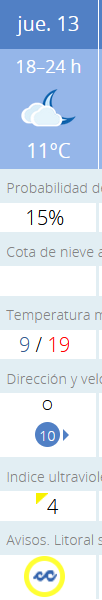

In [ ]:
model.save("modelo_temperatura_media.h5")  # Guarda en formato HDF5 (.h5)


In [ ]:
import joblib

joblib.dump(scaler_X, "scaler_X_media.pkl")  # Guardar el escalador de entrada
joblib.dump(scaler_y, "scaler_y_media.pkl")  # Guardar el escalador de salida


['scaler_y_media.pkl']

# Practica con capas LSTM


In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 📌 5. Construcción del modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(21, 1)),
    LSTM(50, activation="relu"),
    Dense(1)
])

model_lstm.compile(optimizer="adam", loss="mse")

# 📌 6. Entrenamiento del modelo
model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20


c:\Users\danie\Documents\prediccion_temperaturas\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.4207 - val_loss: 0.2392
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2393 - val_loss: 0.2147
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2282 - val_loss: 0.2135
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2224 - val_loss: 0.2087
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2197 - val_loss: 0.1998
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2180 - val_loss: 0.2202
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2169 - val_loss: 0.2022
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2160 - val_loss: 0.1984
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2195 - val_loss: 0.1980
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2148 - val_loss: 0.2129
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2129 - val_loss: 0.2005
Epoch 12/20
1250/1250 ━━━━━━━━━━━━━━━━━━━

In [ ]:
predictions = scaler_y.inverse_transform(predictions)  # Desnormalizar

In [48]:
# 🔹 Ejemplo: Nuevos datos (5 características)
X_nuevo = np.array([generate_new_raw_data(221.0, 118, 3, 12, 220, 221, 226, 114, lluvia = 1)])  # Datos de prueba

# 🔹 Normalizar con el mismo escalador usado en el entrenamiento
X_nuevo_scaled = scaler_X.transform(X_nuevo)

print(X_nuevo_scaled[0])

# 🔹 Hacer la predicción
y_pred_scaled = model_lstm.predict(X_nuevo_scaled)

# 🔹 Desnormalizar la predicción para obtener la temperatura real
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print(f"Temperatura predicha: {y_pred[0][0]:.2f} °C")

No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
longitud lista 19
[-0.18959453 -0.39014941 -3.05484242 -0.46445321 -0.01549379 -0.05374308
 -0.15424963 -0.09803827 -0.37074167 -0.04609234  0.          0.29776655
  1.37699726  1.4284253  -0.00544721 -0.11311015 -0.18958398 -0.17670481
  0.58924336]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

c:\Users\danie\Documents\prediccion_temperaturas\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Temperatura predicha: 188.49 °C


# Prueba con Machine Learning

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [50]:
# Definir hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Modelo base
modelo = DecisionTreeRegressor()

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [51]:
# Entrenamos al modelo con esos hiperparametros
mejor_modelo = grid_search.best_estimator_

mejor_modelo.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [53]:
y_pred = mejor_modelo.predict(X_test)


In [54]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error Absoluto Medio (MAE): 0.33
Coeficiente de determinación (R²): 0.79


In [55]:
# 🔹 Ejemplo: Nuevos datos (5 características)
X_nuevo = np.array([generate_new_raw_data(221.0, 118, 3, 12, 220, 221, 226, 114, lluvia = 1)])  # Datos de prueba

# 🔹 Normalizar con el mismo escalador usado en el entrenamiento
X_nuevo_scaled = scaler_X.transform(X_nuevo)

# 🔹 Hacer la predicción
y_pred_scaled = mejor_modelo.predict(X_nuevo_scaled)

# Desescalar las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print(f"Predicción de temperatura: {y_pred[0][0]}°C")

No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
No se ha encontrado ningun estado coindidente como parametro.
longitud lista 19
Predicción de temperatura: 184.37599999999995°C


c:\Users\danie\Documents\prediccion_temperaturas\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Conclusiones

Tras los experimentos realizados, podemos afirmar que las tres aproximaciones exploradas (árboles de decisión, redes densas y LSTM) resultan válidas para la tarea de predicción de temperatura.

Un hallazgo interesante fue comprobar que los árboles de decisión, a pesar de su simplicidad, ofrecieron un rendimiento muy competitivo, llegando a obtener predicciones similares a las redes densas. Con una sencilla búsqueda en cuadrícula (Grid Search) fue posible ajustar el modelo y encontrar la configuración más adecuada.

Por otro lado, las redes LSTM, diseñadas para trabajar con datos secuenciales, fueron las que lograron acercarse más a la predicción real de AEMET para el 13 de marzo, alcanzando con éxito la estimación de 19 °C.

En conclusión, cada enfoque aporta ventajas diferentes:

Los árboles de decisión destacan por su facilidad de uso y eficiencia.

Las redes densas ofrecen un equilibrio entre simplicidad y precisión.

Las LSTM muestran mayor capacidad de capturar la dinámica temporal, reflejándose en predicciones más exactas.